images taken from here: https://www.kaggle.com/datasets/danielwe14/stereocamera-chessboard-pictures/data

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
chessboard_size = (11, 7)  # inner corners per row and column
square_size = 30  # size of a square in mm

In [3]:
# prepare object points (3D coordinates of the chessboard corners)
objp = np.zeros((chessboard_size[0] * chessboard_size[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1, 2) * square_size

objpoints = []  # 3D points in real world space
imgpoints = []  # 2D points in image plane

In [4]:
images = [cv2.imread(f'calibration_images/image{i}.png') for i in range(1, 6)]

for img in images:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, chessboard_size, None)

    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

        cv2.drawChessboardCorners(img, chessboard_size, corners, ret)
        cv2.imshow('Chessboard', img)
        cv2.waitKey(1000)

cv2.destroyAllWindows()

In [5]:
ret, camera_matrix, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

ret: The overall RMS re-projection error, which gives an indication of the accuracy of the calibration.

cameraMatrix: The intrinsic camera matrix, which includes focal lengths and the optical center.

distCoeffs: The distortion coefficients, which describe the lens distortion.

rvecs: The rotation vectors for each calibration image, describing the orientation of the camera.

tvecs: The translation vectors for each calibration image, describing the position of the camera.

In [6]:
ret

0.21929262409391656

In [7]:
camera_matrix

array([[724.20509359,   0.        , 525.86828801],
       [  0.        , 735.24239818, 290.7177132 ],
       [  0.        ,   0.        ,   1.        ]])

In [8]:
dist_coeffs

array([[ 0.04097381, -0.1863369 ,  0.00174359,  0.00252276,  0.20763912]])

In [9]:
rvecs

(array([[-0.03667123],
        [ 0.00548936],
        [ 0.02147407]]),
 array([[-0.04674206],
        [-0.03776899],
        [ 0.07782612]]),
 array([[-0.18182492],
        [ 0.00154898],
        [-0.05413229]]),
 array([[ 0.14335948],
        [ 0.06597696],
        [-0.02910444]]),
 array([[ 0.05510548],
        [-0.10070629],
        [-0.02394155]]))

In [10]:
tvecs

(array([[-275.89129776],
        [-124.70933876],
        [ 545.84194432]]),
 array([[-242.08073046],
        [-141.9488133 ],
        [ 531.18433232]]),
 array([[-263.3369969 ],
        [-137.43490023],
        [ 536.47708515]]),
 array([[-232.16178163],
        [ -64.92858705],
        [ 498.57423417]]),
 array([[-252.842863  ],
        [-131.10407942],
        [ 486.21079203]]))

distortion coefficients

In [11]:
dist_coeffs

array([[ 0.04097381, -0.1863369 ,  0.00174359,  0.00252276,  0.20763912]])

undistort an example image

In [12]:
test_img = cv2.imread("calibration_images/image4.png")
undistorted_img = cv2.undistort(test_img, camera_matrix, dist_coeffs)

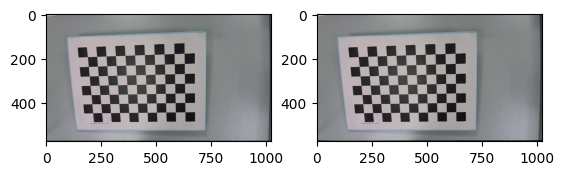

In [13]:
plt.subplot(121)
plt.imshow(test_img)
plt.subplot(122)
plt.imshow(undistorted_img)

In [14]:
(test_img - undistorted_img).mean()

np.float64(63.94842642324942)

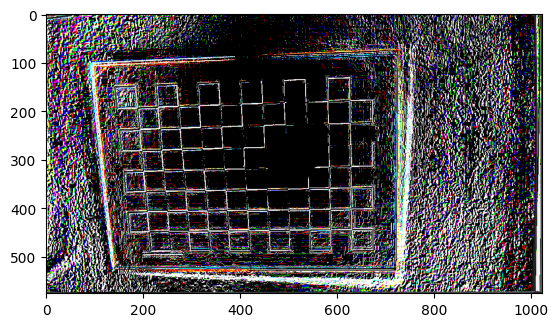

In [15]:
plt.imshow(test_img - undistorted_img)